In [1]:
import numpy as np
import cupy as cp
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from numpy.linalg import norm

In [2]:
import main
data = main.load_data()

In [3]:
data_c1 = data[data[10]==1.0]
data_c0 = data[data[10]==0.0]
data_nn = data[data[9].notnull()]
data_c1_nn = data_nn[data_nn[10]==1.0]
data_c0_nn = data_nn[data_nn[10]==0.0]

In [4]:
%matplotlib inline
n_bins = 50

In [5]:
def histogram(axis, data = data, n_bins = n_bins):
    fig, axs = plt.subplots(1, 3, sharey=False)
    axs[0].hist(np.array(data.T)[axis], bins=n_bins)    
    axs[1].hist(np.array(data[data[10]==0.0].T)[axis], bins=n_bins)
    axs[2].hist(np.array(data[data[10]==1.0].T)[axis], bins=n_bins)




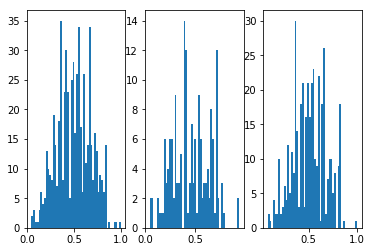

In [6]:
histogram(0)

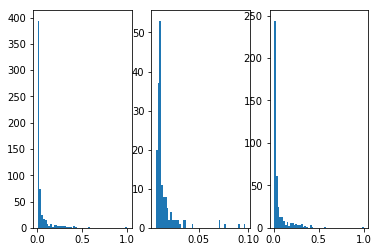

In [7]:
histogram(2)

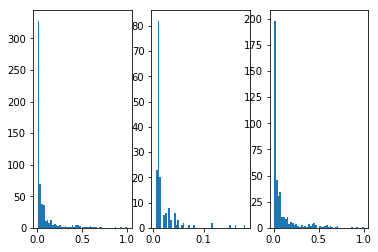

In [8]:
histogram(3)

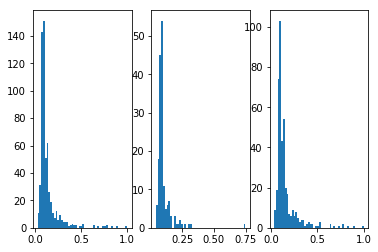

In [9]:
histogram(4)

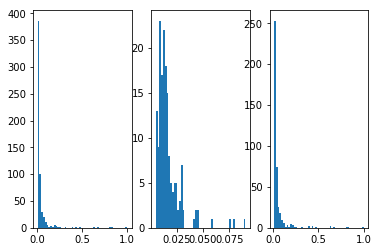

In [10]:
histogram(5)

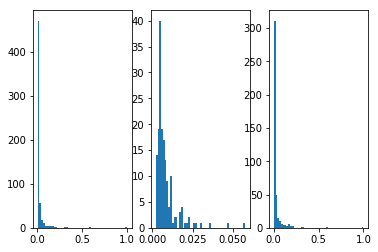

In [11]:
histogram(6)

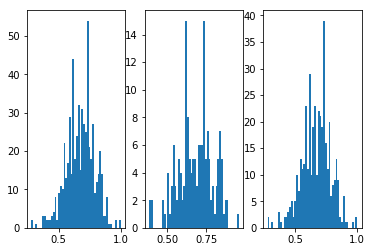

In [12]:
histogram(7)

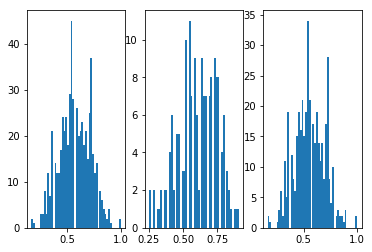

In [13]:
histogram(8)

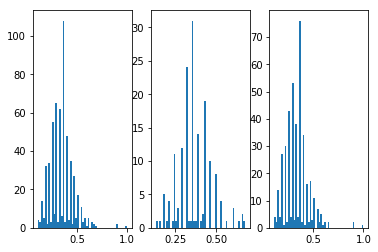

In [14]:
histogram(9, data_nn)

0 0


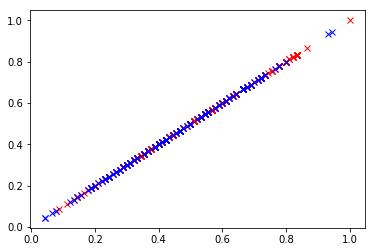

0 1


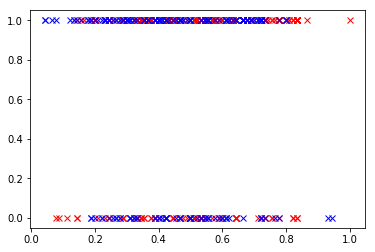

0 2


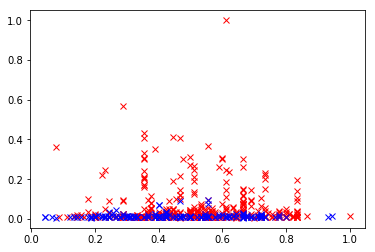

0 3


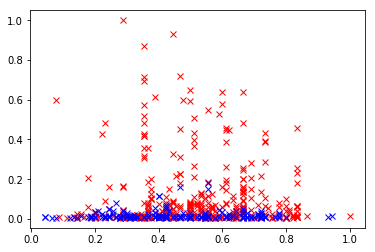

0 4


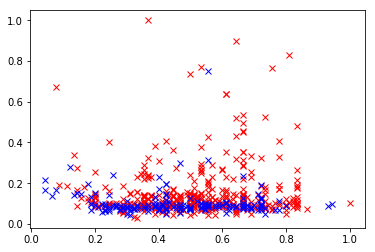

0 5


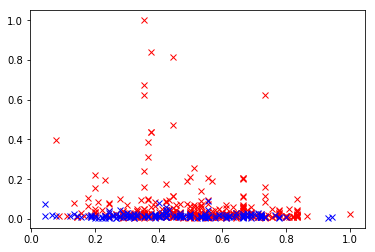

0 6


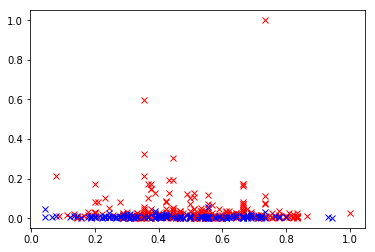

0 7


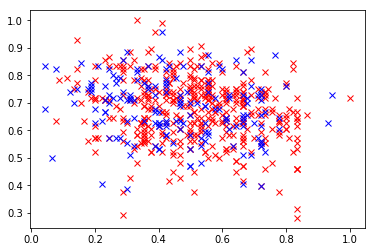

0 8


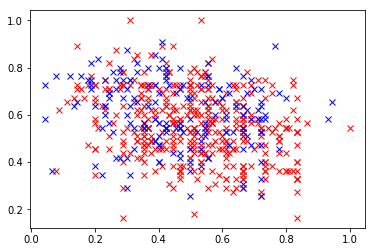

0 9


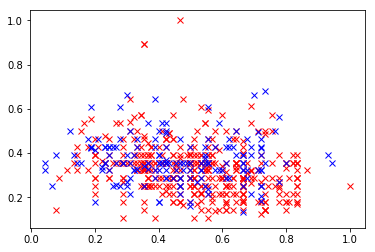

0 10


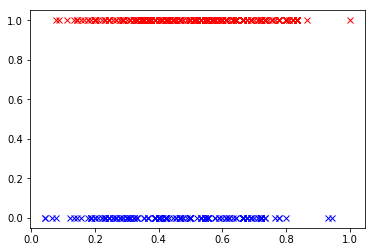

1 0


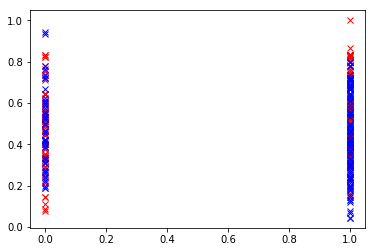

1 1


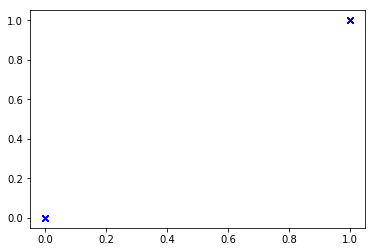

1 2


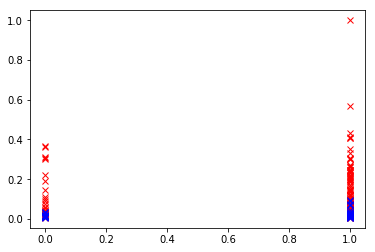

1 3


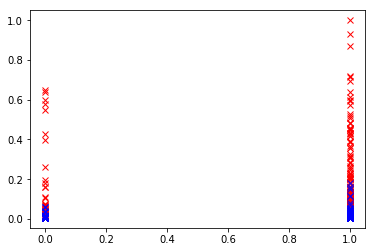

1 4


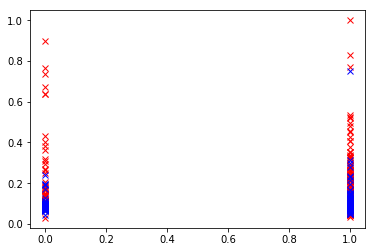

1 5


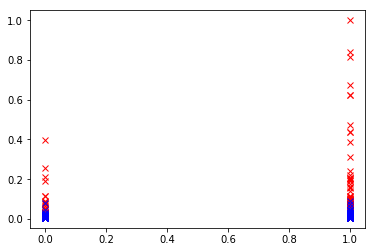

1 6


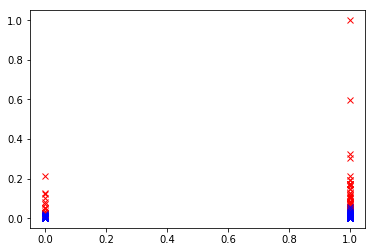

1 7


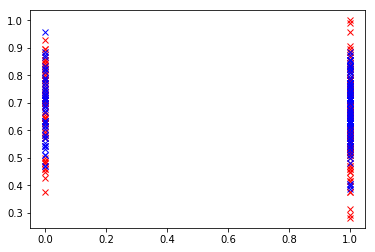

1 8


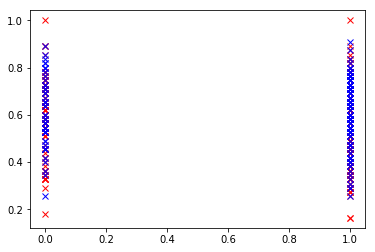

1 9


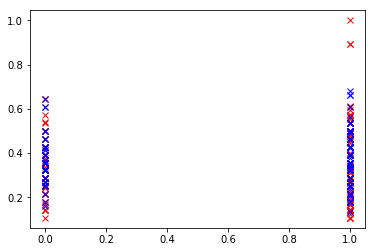

1 10


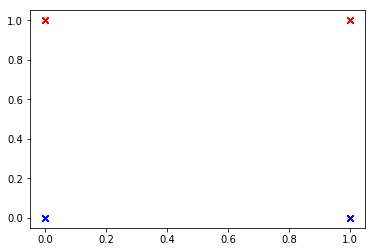

2 0


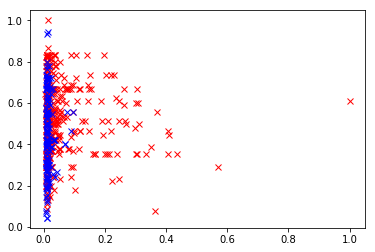

2 1


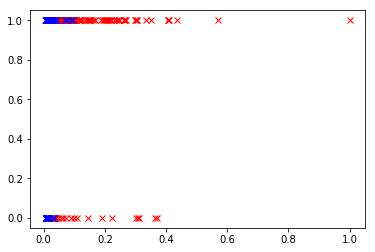

2 2


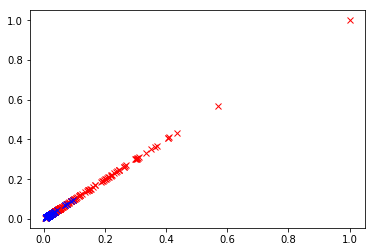

2 3


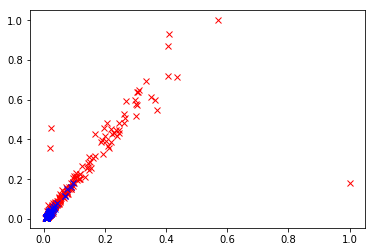

2 4


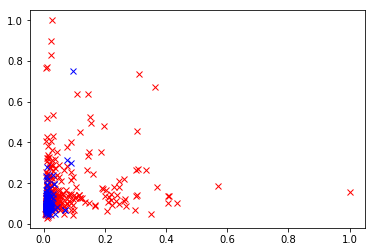

2 5


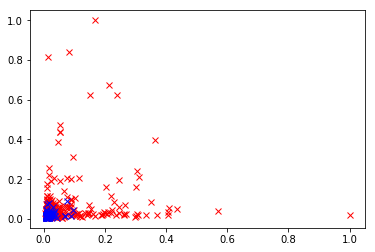

2 6


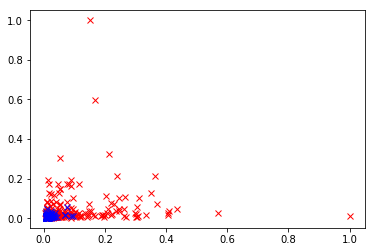

2 7


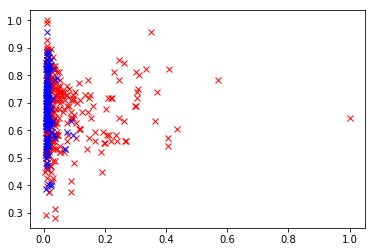

2 8


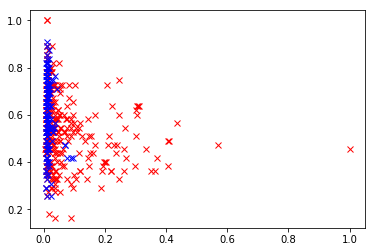

2 9


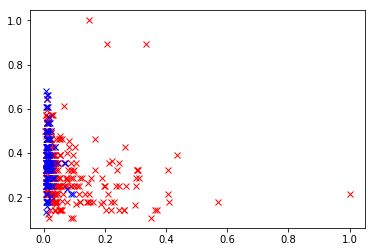

2 10


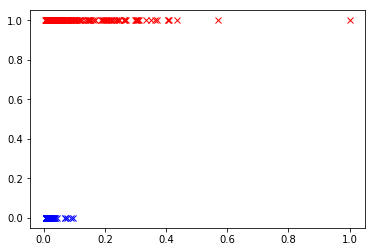

3 0


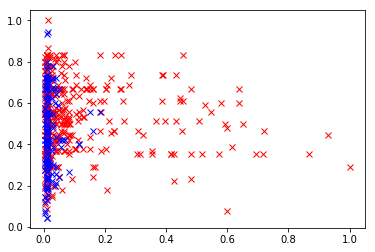

3 1


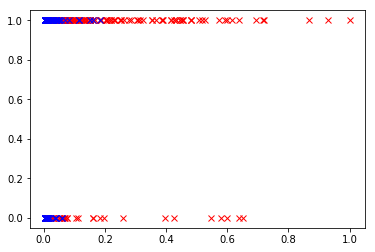

3 2


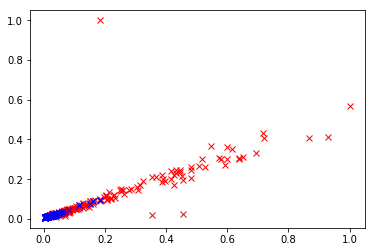

3 3


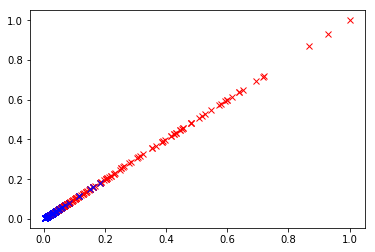

3 4


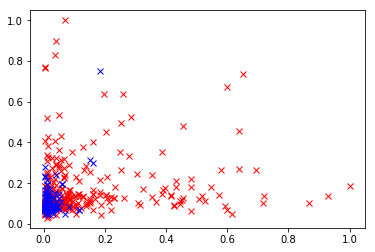

3 5


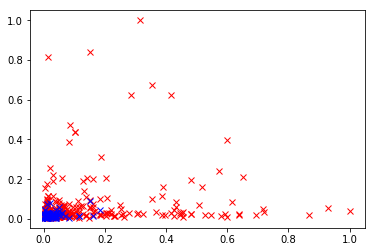

3 6


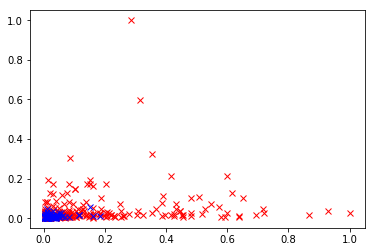

3 7


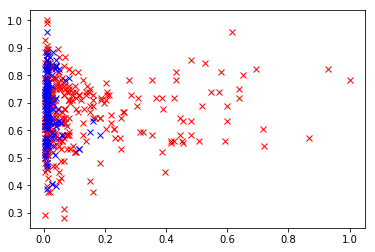

3 8


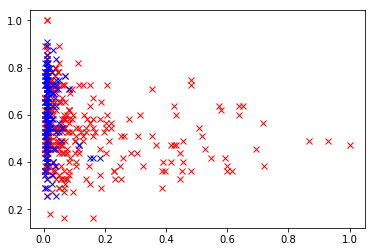

3 9


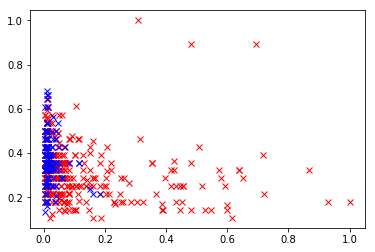

3 10


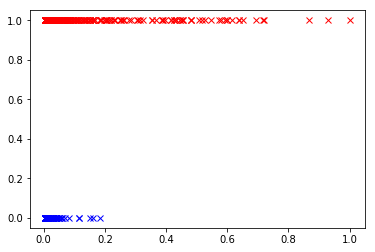

4 0


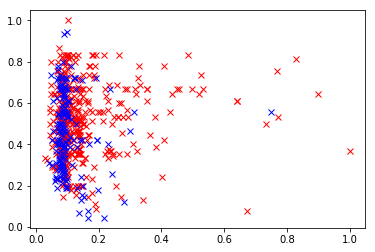

4 1


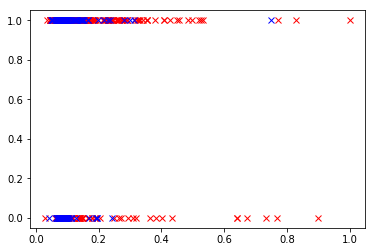

4 2


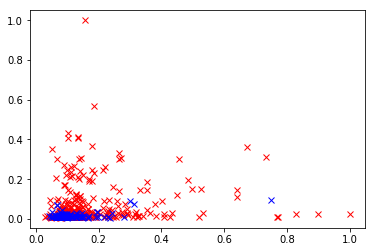

4 3


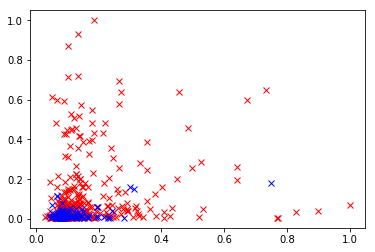

4 4


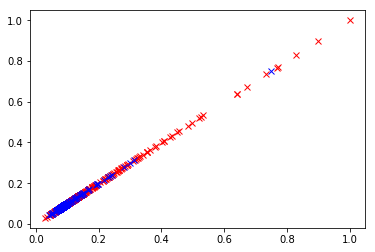

4 5


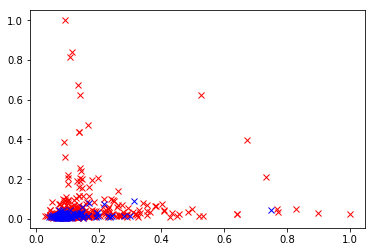

4 6


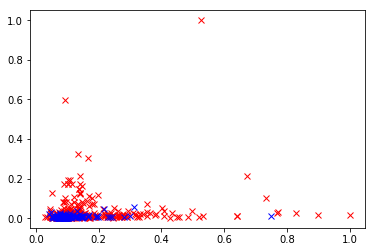

4 7


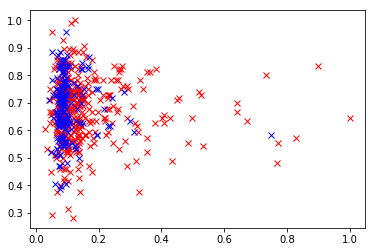

4 8


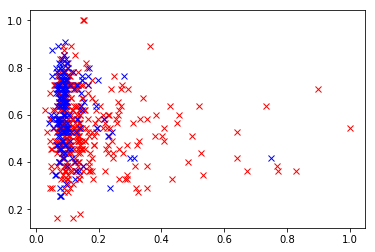

4 9


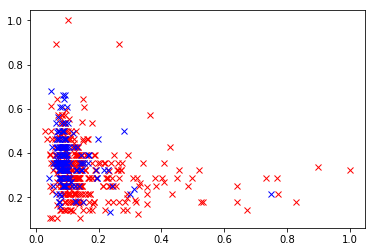

4 10


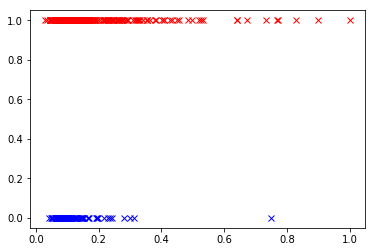

5 0


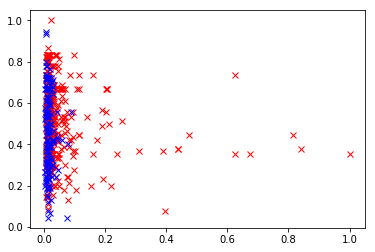

5 1


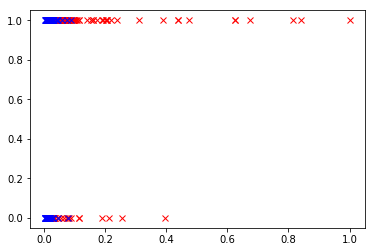

5 2


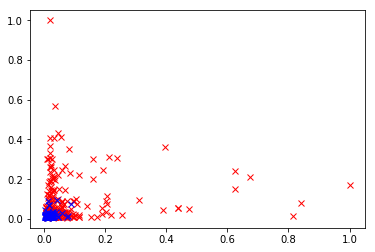

5 3


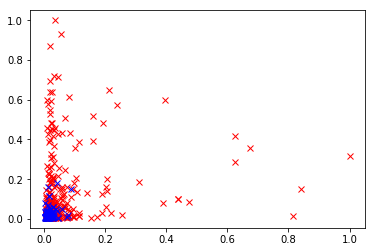

5 4


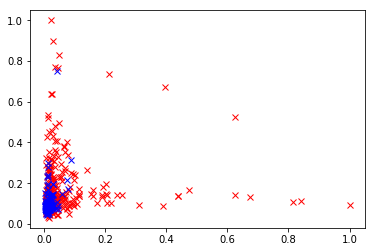

5 5


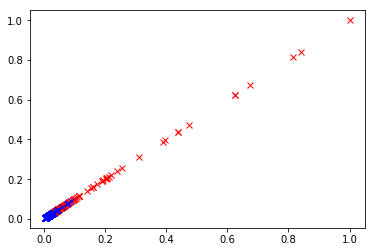

5 6


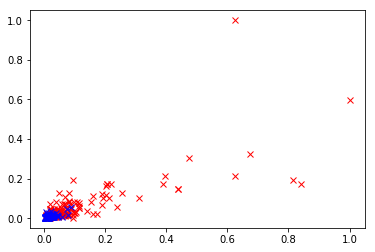

5 7


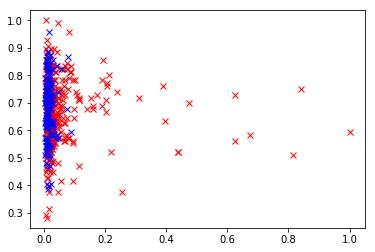

5 8


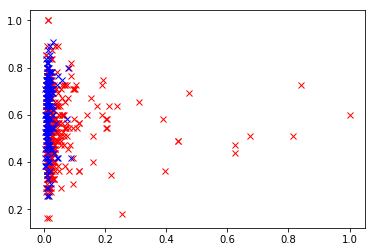

5 9


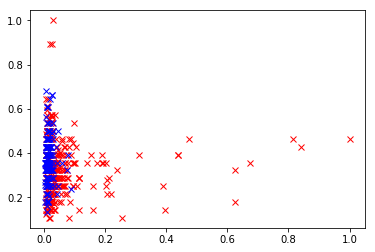

5 10


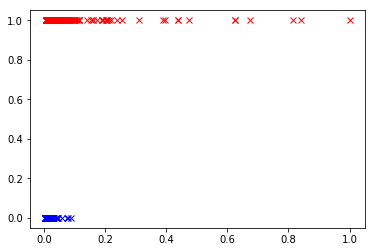

6 0


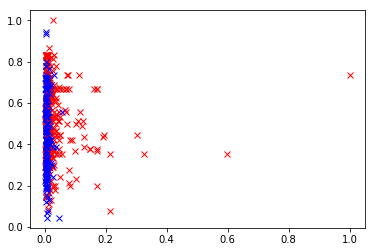

6 1


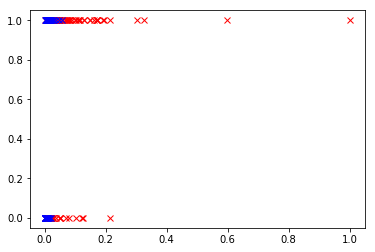

6 2


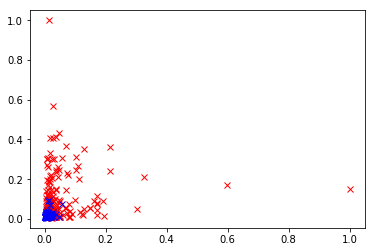

6 3


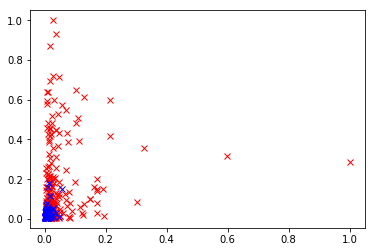

6 4


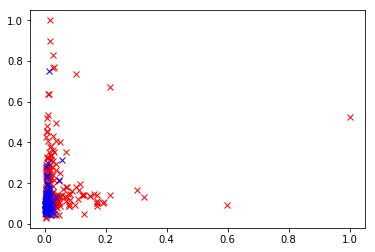

6 5


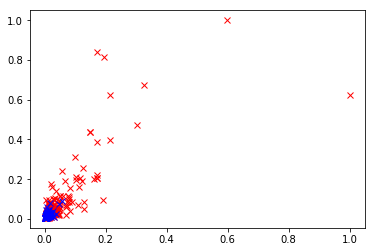

6 6


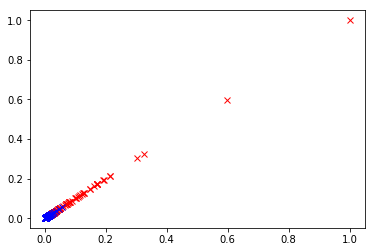

6 7


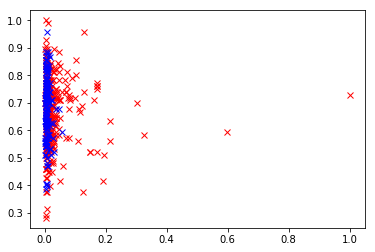

6 8


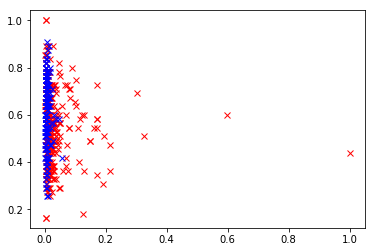

6 9


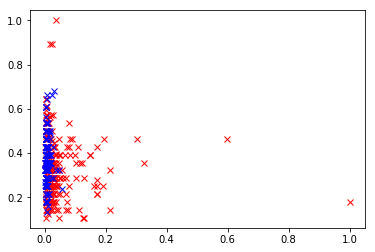

6 10


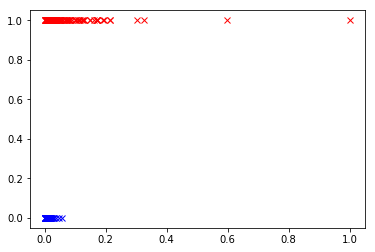

7 0


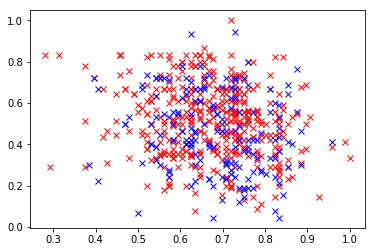

7 1


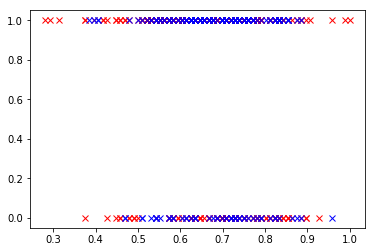

7 2


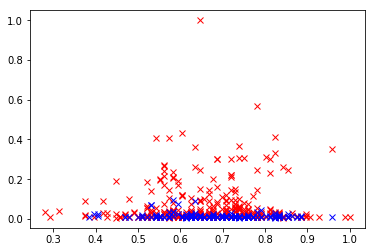

7 3


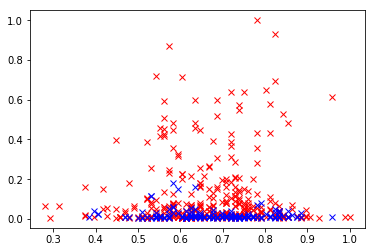

7 4


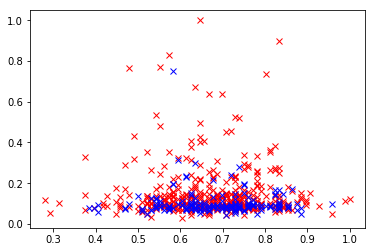

7 5


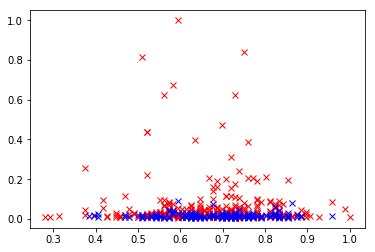

7 6


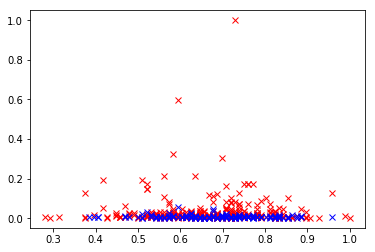

7 7


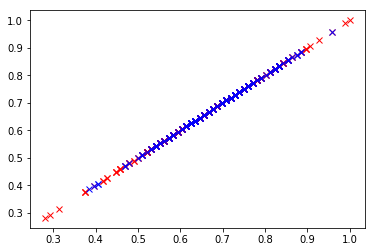

7 8


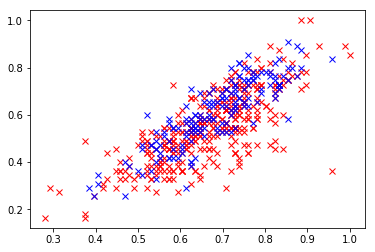

7 9


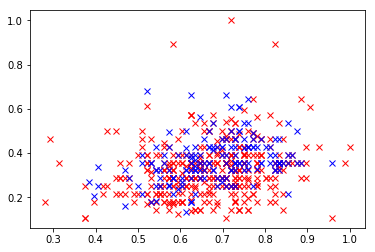

7 10


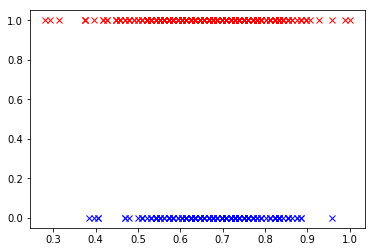

8 0


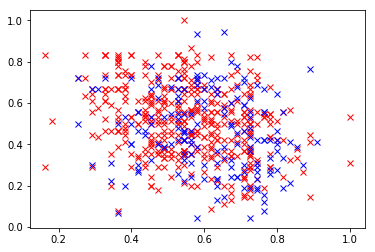

8 1


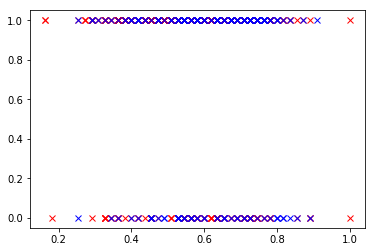

8 2


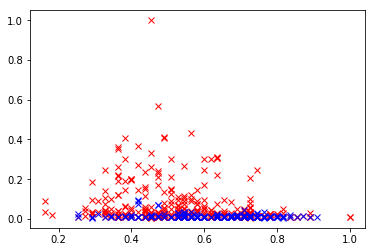

8 3


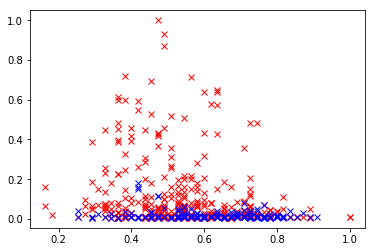

8 4


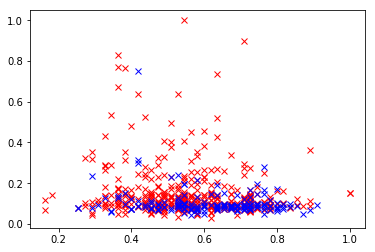

8 5


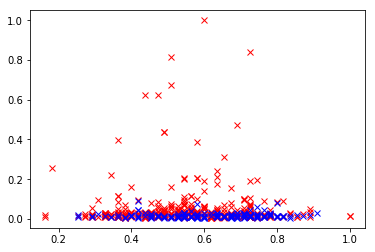

8 6


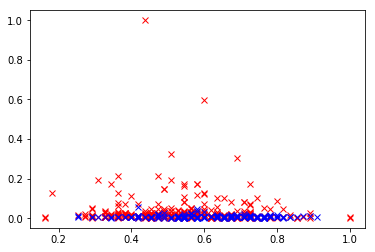

8 7


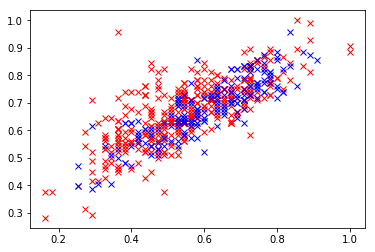

8 8


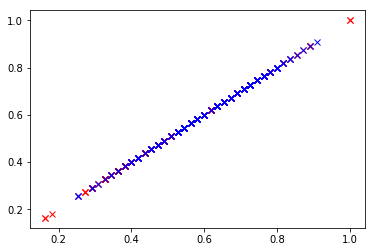

8 9


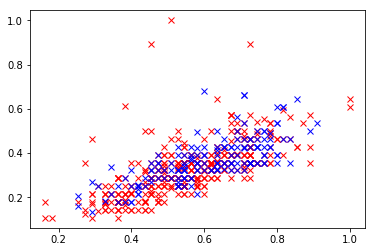

8 10


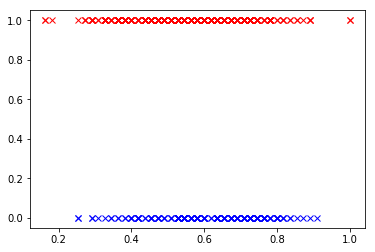

9 0


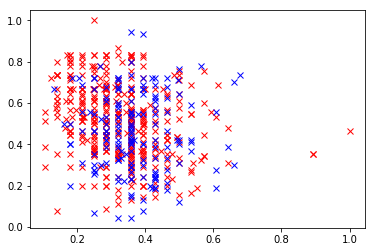

9 1


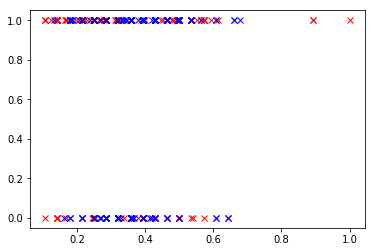

9 2


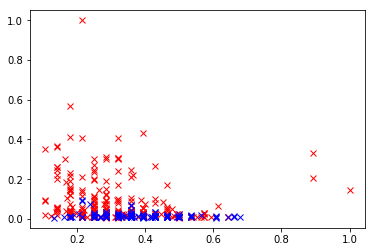

9 3


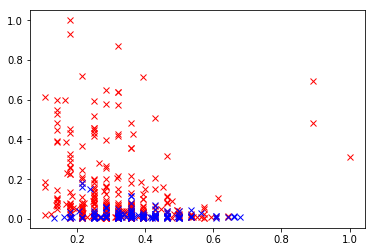

9 4


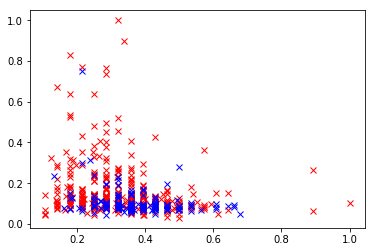

9 5


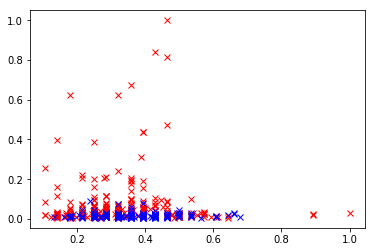

9 6


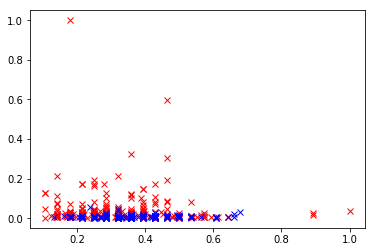

9 7


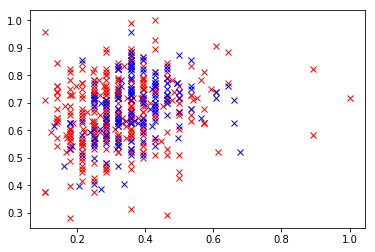

9 8


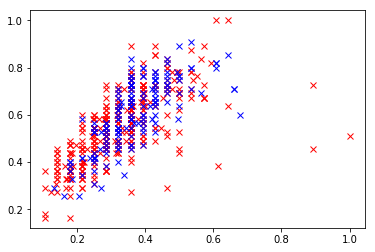

9 9


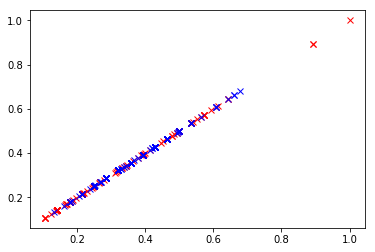

9 10


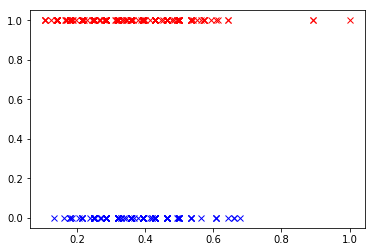

10 0


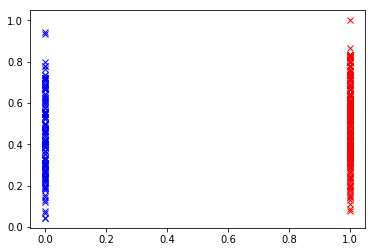

10 1


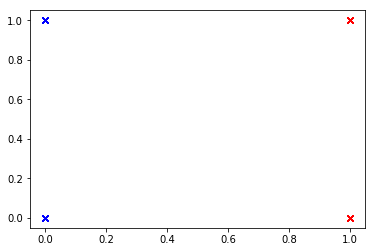

10 2


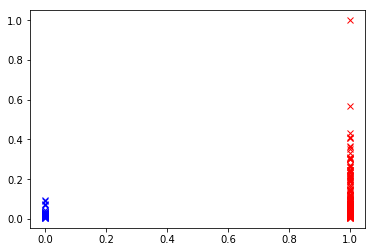

10 3


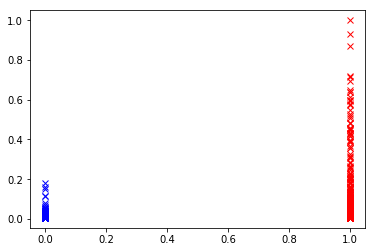

10 4


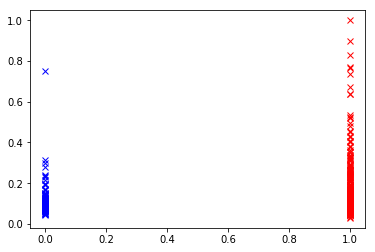

10 5


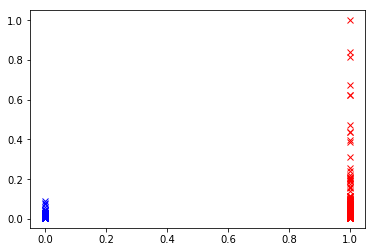

10 6


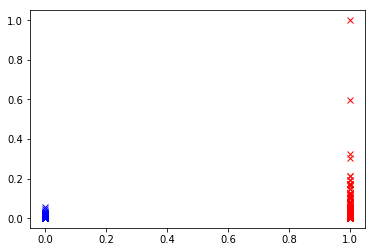

10 7


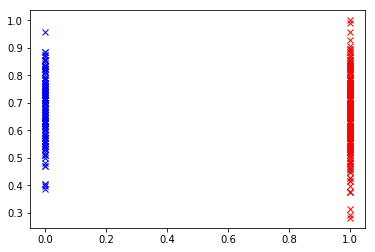

10 8


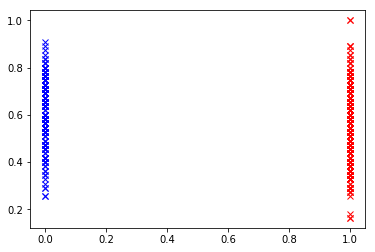

10 9


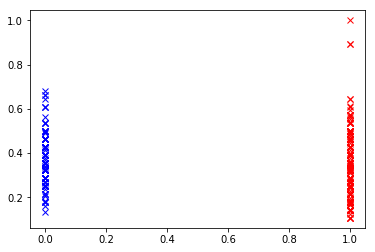

10 10


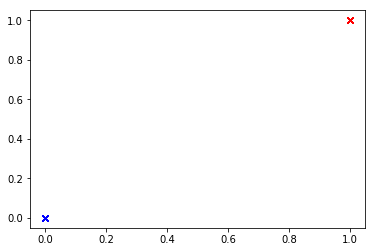

In [15]:
def two_var_plot_color_by_class(it_1_var, it_2_var = -1, axs = -1):
    if(it_2_var==-1):
        it_2_var = it_1_var
    if axs == -1:
        
        plt.plot(data_c1[it_1_var], data_c1[it_2_var], 'rx', data_c0[it_1_var], data_c0[it_2_var], 'bx') 
    else:
        axs.plot(data_c1[it_1_var], data_c1[it_2_var], 'r^', data_c0[it_1_var], data_c0[it_2_var], 'b^') 

#fig, axs = plt.subplots(11, 11, sharey=False)
for it_1 in data:
    for it_2 in data:
        two_var_plot_color_by_class(it_1, it_2)
        print(str(it_1) + " " + str(it_2))
        plt.pause(0.01)
        

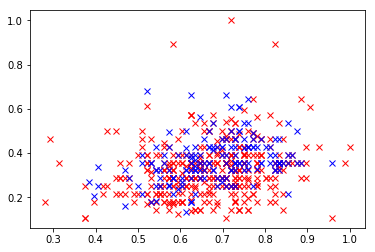

In [16]:
two_var_plot_color_by_class(7,9) #2 i 3 zalezne  (7 i 8) ( 6 i 5) (9 i 8 => 9 aproksymujemy za pomocą 8)
# (0,7) -> kompletnie niezależne od siebie i klasy, 0,8 i 0.9, 9.7 mocno niezależne
# 9 jest skwantowane
# 2 i 3 i 6(choć gorzej) ma dobrą wartość diagnostyczną
# 4 i 5 raczej średnia
# 7,9 raczej słabo
# 8 jeszcze gorzej
# 7 i 9 lekka korelacja może być

In [17]:
def normalize(vect):
    return vect/norm(vect)

def dot_product_mean(vect, data_tmp_c1 = data_c1_nn, func = np.mean):
    return func(list(map(lambda vect_c1, vect_c0 = vect: np.dot(normalize(vect_c1), normalize(vect_c0)), np.array(data_tmp_c1))))#-0.0000001


In [18]:
# #wraz z atrybutem klasy co fauszuje trochę wynik
# list_of_dot_product_mean = list(map(lambda vect_c0: dot_product_mean(vect_c0) , np.array(data_c0_nn)))
# len(list_of_dot_product_mean)
# # list_of_dot_product_mean
# list_of_mean_angel_beetween_class_by_vect_from_class_0 = list((np.arccos(list_of_dot_product_mean)/np.pi*180))
# list_of_mean_angel_beetween_class_by_vect_from_class_0 

In [19]:
# list_of_mean_angel_beetween_class_by_vect_from_class_0
# mean_angel_beetween_class = np.mean(list_of_mean_angel_beetween_class_by_vect_from_class_0)
# mean_angel_beetween_class

In [20]:
def mean_angel_beetween_class(data_tmp_c0 = data_c0_nn, data_tmp_c1 = data_c1_nn, func = np.mean, fun_ret = np.mean):
    list_of_dot_product_mean = list(map(lambda vect_c0: dot_product_mean(vect_c0, data_tmp_c1, func) , np.array(data_tmp_c0)))
#     print(list_of_dot_product_mean)
    list_of_mean_angel_beetween_class_by_vect_from_class_0 = list((np.arccos(list_of_dot_product_mean)/np.pi*180))
    return fun_ret(list_of_mean_angel_beetween_class_by_vect_from_class_0)


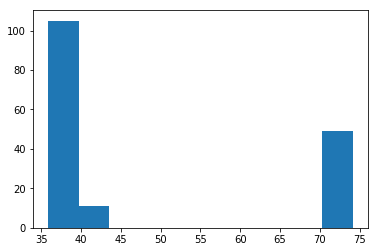

In [21]:
c1 = pd.DataFrame(np.array(data_c1_nn[data_c1_nn[1] >= 0.0])[:, 1:4]) #płeć mocno rozróżnia, [0] - wprowadza duży szum 8 9 i 10 też
# print(c1) 
c0 = pd.DataFrame (np.array(data_c0_nn[data_c0_nn[1] >= 0.0])[:, 1:4]) # na razie dobra rozróżnialność to 1:3 (49.32) 
def fun(dat):
    tmp = pd.DataFrame(dat).T
    plt.hist(tmp, bins = 10)
# print(mean_angel_beetween_class(c0, c1, np.mean, np.mean))
# print(mean_angel_beetween_class(c1, c1, np.mean, np.max))
# print(mean_angel_beetween_class(c0, c0, np.mean, np.max))


mean_angel_beetween_class(c0, c1, np.mean, fun)

In [22]:
# data[list([1,2,3])]
# pd.DataFrame(np.array(data)[:, [0,2,5]])
np.arange(10)
def review_fun(data_in_fun):
    c1 = data_in_fun[data[10]==1.0]
    c0 = data_in_fun[data[10]==0.0]
    return mean_angel_beetween_class(c0, c1, np.mean, np.mean)

def find_best_next_atribut(indexes_to_use, indexes_added = [0,], best_indexes = [0,], best_value = 0):
    if len(indexes_to_use) <= 0:
        return (best_value, best_indexes) 
    change = False
#     print (indexes_to_use)
    for it, index in enumerate(indexes_to_use):
        indexes_added.append(index)
#         print(indexes_added)
#         print(pd.DataFrame(np.array(data)[:, indexes_added]))
        review_value = review_fun(pd.DataFrame(np.array(data_nn)[:, indexes_added]))
#         print(review_value)
        if review_value > best_value:
            best_value = review_value
            best_indexes = indexes_added[:]
            change = True
        indexes_added.pop()
    print(best_indexes)
    if change:
        indexes_to_use.remove(best_indexes[-1])
        return find_best_next_atribut(indexes_to_use, best_indexes, best_value = best_value, best_indexes = best_indexes)
    return (best_value, best_indexes) 
        
def find_best_in_startpoint(startpoint):
    indexes_to_use = list(range(10))
    indexes_to_use.remove(startpoint)
    best_indexes = [startpoint, ]
    indexes_added = [startpoint, ]
    return find_best_next_atribut(indexes_to_use, indexes_added, best_indexes)
    

In [27]:
def find_best_atrib():
    max = [0,[]]
    for it in list(range(10)):
        find_best = find_best_in_startpoint(it)
        if find_best[0] > max[0]:
            max = find_best
        print("Wynik (startpoint: " + str(it) + "): " + str(find_best))
    return max
print("Najlepszy wynik: " + str(find_best_atrib()))

E:\Aplikacje\Aplikacje\Programowanie\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
E:\Aplikacje\Aplikacje\Programowanie\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[0, 1]
[0, 1, 3]
[0, 1, 3, 4]
[0, 1, 3, 4, 5]
[0, 1, 3, 4, 5, 2]
[0, 1, 3, 4, 5, 2, 6]
[0, 1, 3, 4, 5, 2, 6]
Wynik (startpoint: 0): (40.274255117782737, [0, 1, 3, 4, 5, 2, 6])
[1, 6]
[1, 6]
Wynik (startpoint: 1): (49.368546731800301, [1, 6])
[2, 1]
[2, 1, 6]
[2, 1, 6, 5]
[2, 1, 6, 5, 3]
[2, 1, 6, 5, 3]
Wynik (startpoint: 2): (49.422830223581215, [2, 1, 6, 5, 3])
[3, 1]
[3, 1, 5]
[3, 1, 5, 6]
[3, 1, 5, 6]
Wynik (startpoint: 3): (49.490732749018647, [3, 1, 5, 6])
[4, 1]
[4, 1, 3]
[4, 1, 3, 5]
[4, 1, 3, 5, 2]
[4, 1, 3, 5, 2, 6]
[4, 1, 3, 5, 2, 6]
Wynik (startpoint: 4): (47.960002542991404, [4, 1, 3, 5, 2, 6])
[5, 1]
[5, 1, 3]
[5, 1, 3, 6]
[5, 1, 3, 6]
Wynik (startpoint: 5): (49.490732749018647, [5, 1, 3, 6])
[6, 1]
[6, 1]
Wynik (startpoint: 6): (49.368546731800301, [6, 1])
[7, 1]
[7, 1, 3]
[7, 1, 3, 4]
[7, 1, 3, 4, 5]
[7, 1, 3, 4, 5, 2]
[7, 1, 3, 4, 5, 2, 6]
[7, 1, 3, 4, 5, 2, 6]
Wynik (startpoint: 7): (35.232673256885697, [7, 1, 3, 4, 5, 2, 6])
[8, 1]
[8, 1, 3]
[8, 1, 3, 4]
[8, 1, 3, 4, 